In [38]:
# Required libraries
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\framingham.csv')

# Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())


Dataset Head:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1   

In [39]:
# Step 2: Data Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in each column:\n", missing_values)

# Handle missing values (fill with mean for simplicity)
data.fillna(data.mean(), inplace=True)

# Class imbalance handling (if applicable)
class_counts = data['TenYearCHD'].value_counts()
print("\nClass Distribution:\n", class_counts)

# (Optional) Implement techniques like SMOTE for handling class imbalance if necessary
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['TenYearCHD'])  # Features
y = data['TenYearCHD']  # Target variable

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("\nResampled Class Distribution:\n", pd.Series(y_resampled).value_counts())



Missing Values in each column:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Class Distribution:
 TenYearCHD
0    3596
1     644
Name: count, dtype: int64

Resampled Class Distribution:
 TenYearCHD
0    3596
1    3596
Name: count, dtype: int64


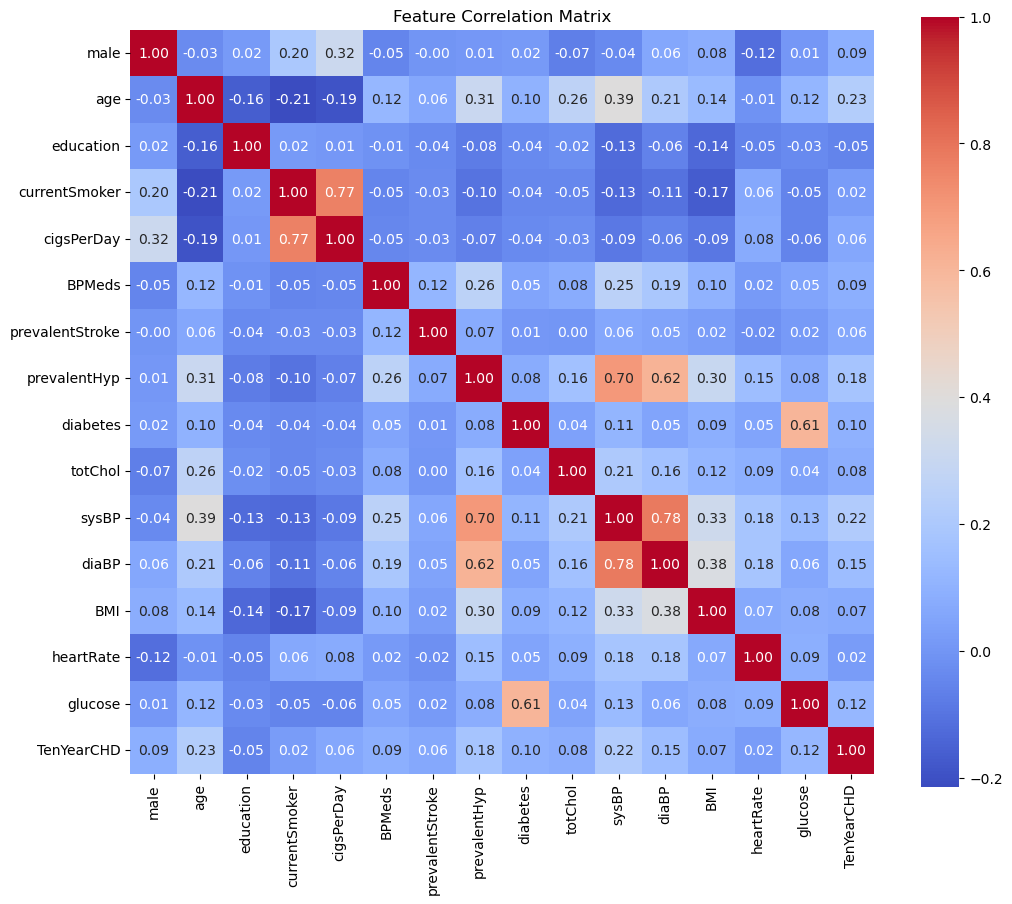


Feature Correlation Values with Target (TenYearCHD):
 TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.120451
diabetes           0.097344
male               0.088374
BPMeds             0.086805
totChol            0.081807
BMI                0.074788
prevalentStroke    0.061823
cigsPerDay         0.057646
heartRate          0.022892
currentSmoker      0.019448
education         -0.053571
Name: TenYearCHD, dtype: float64


In [40]:
#FEATURE CORELATION ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Feature Correlation Analysis
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Displaying correlation values for specific features against the target
target_correlation = correlation_matrix['TenYearCHD'].sort_values(ascending=False)
print("\nFeature Correlation Values with Target (TenYearCHD):\n", target_correlation)




In [41]:
#ANOVA F TEST 

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

# Step 4: Feature Selection using ANOVA F-Test
anova_selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_anova = anova_selector.fit_transform(X_resampled, y_resampled)

# Get the selected feature names
anova_selected_features = X.columns[anova_selector.get_support()]
print("\nSelected Features via ANOVA:", anova_selected_features)



Selected Features via ANOVA: Index(['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose'],
      dtype='object')


In [43]:
#LESSO 

In [44]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Step 4: Feature Selection using LASSO
lasso = LassoCV(cv=5, random_state=42).fit(X_resampled, y_resampled)

# Select features where LASSO coefficients are non-zero
lasso_selector = SelectFromModel(lasso, prefit=True)
X_lasso = lasso_selector.transform(X_resampled)

# Get the selected feature names
lasso_selected_features = X.columns[lasso_selector.get_support()]
print("\nSelected Features via LASSO:", lasso_selected_features)



Selected Features via LASSO: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


C:\Users\anike\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [45]:
#MUTUAL INFORMATION

In [46]:
from sklearn.feature_selection import mutual_info_classif

# Step 4: Feature Selection using Mutual Information
mutual_info = mutual_info_classif(X_resampled, y_resampled)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_sorted = mutual_info_series.sort_values(ascending=False)

# Select top 10 features
top_mutual_info_features = mutual_info_sorted.head(10)
print("\nTop Features via Mutual Information:\n", top_mutual_info_features)

# Transforming data with top features
X_mutual_info = X_resampled[top_mutual_info_features.index]



Top Features via Mutual Information:
 glucose       0.366017
diaBP         0.365101
heartRate     0.359159
sysBP         0.340711
totChol       0.317386
education     0.253112
cigsPerDay    0.169088
BMI           0.119127
age           0.055555
BPMeds        0.043607
dtype: float64


In [47]:
#LOGISTIC REGRESSION

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the resampled dataset into training and testing sets using ANOVA-selected features
X_train_anova, X_test_anova, y_train, y_test = train_test_split(X_anova, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression with ANOVA-selected features
logreg_anova = LogisticRegression(max_iter=1000, random_state=42)
logreg_anova.fit(X_train_anova, y_train)
y_pred_logreg_anova = logreg_anova.predict(X_test_anova)

# Evaluation for Logistic Regression
print("\nLogistic Regression (ANOVA) Accuracy:", accuracy_score(y_test, y_pred_logreg_anova))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_anova))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_anova))



Logistic Regression (ANOVA) Accuracy: 0.6657400972897846
Confusion Matrix:
 [[485 260]
 [221 473]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       745
           1       0.65      0.68      0.66       694

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439



In [49]:
#RANDOM FOREST 

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Split the resampled dataset into training and testing sets using Mutual Information-selected features
X_train_mi, X_test_mi, y_train, y_test = train_test_split(X_mutual_info, y_resampled, test_size=0.2, random_state=42)

# Random Forest with Mutual Information-selected features
rf_mi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_mi.fit(X_train_mi, y_train)
y_pred_rf_mi = rf_mi.predict(X_test_mi)

# Evaluation for Random Forest
print("\nRandom Forest (Mutual Information) Accuracy:", accuracy_score(y_test, y_pred_rf_mi))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_mi))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_mi))



Random Forest (Mutual Information) Accuracy: 0.9034051424600417
Confusion Matrix:
 [[679  66]
 [ 73 621]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       745
           1       0.90      0.89      0.90       694

    accuracy                           0.90      1439
   macro avg       0.90      0.90      0.90      1439
weighted avg       0.90      0.90      0.90      1439



In [51]:
#SUPPORT VECTOR MACHINE

In [52]:
from sklearn.svm import SVC

# Split the resampled dataset into training and testing sets using LASSO-selected features
X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X_lasso, y_resampled, test_size=0.2, random_state=42)

# Support Vector Machine with LASSO-selected features
svm_model = SVC(random_state=42)
svm_model.fit(X_train_lasso, y_train)
y_pred_svm = svm_model.predict(X_test_lasso)

# Evaluation for SVM
print("\nSupport Vector Machine (LASSO) Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))



Support Vector Machine (LASSO) Accuracy: 0.6497567755385685
Confusion Matrix:
 [[455 290]
 [214 480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       745
           1       0.62      0.69      0.66       694

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439



In [53]:
#KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Using ANOVA-selected features for KNN
X_train_knn, X_test_knn, y_train, y_test = train_test_split(X_anova, y_resampled, test_size=0.2, random_state=42)

# K-Nearest Neighbors with ANOVA-selected features
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train)
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluation for KNN
print("\nK-Nearest Neighbors (ANOVA) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



K-Nearest Neighbors (ANOVA) Accuracy: 0.7970813064628214
Confusion Matrix:
 [[491 254]
 [ 38 656]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.66      0.77       745
           1       0.72      0.95      0.82       694

    accuracy                           0.80      1439
   macro avg       0.82      0.80      0.79      1439
weighted avg       0.83      0.80      0.79      1439



In [55]:
#EVALUATION


--- Logistic Regression Evaluation ---
Accuracy: 0.6657400972897846
Confusion Matrix:
 [[485 260]
 [221 473]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       745
           1       0.65      0.68      0.66       694

    accuracy                           0.67      1439
   macro avg       0.67      0.67      0.67      1439
weighted avg       0.67      0.67      0.67      1439


--- Random Forest Evaluation ---
Accuracy: 0.9034051424600417
Confusion Matrix:
 [[679  66]
 [ 73 621]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       745
           1       0.90      0.89      0.90       694

    accuracy                           0.90      1439
   macro avg       0.90      0.90      0.90      1439
weighted avg       0.90      0.90      0.90      1439


--- Support Vector Machine Evaluation ---
Accuracy: 0.6497567755385685
Confusion 

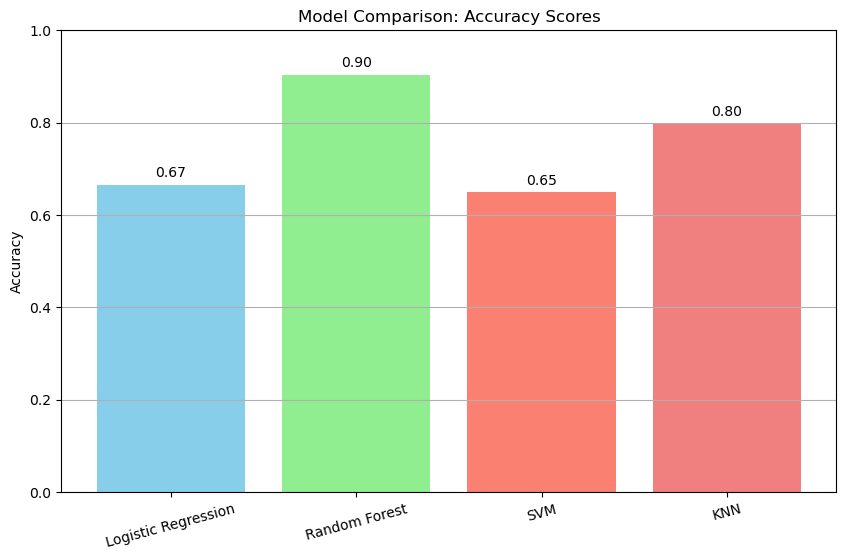

In [56]:
# Logistic Regression Evaluation
print("\n--- Logistic Regression Evaluation ---")
logreg_accuracy = accuracy_score(y_test, y_pred_logreg_anova)
print("Accuracy:", logreg_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_anova))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_anova))

# Random Forest Evaluation
print("\n--- Random Forest Evaluation ---")
rf_accuracy = accuracy_score(y_test, y_pred_rf_mi)
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_mi))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_mi))

# Support Vector Machine Evaluation
print("\n--- Support Vector Machine Evaluation ---")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", svm_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# K-Nearest Neighbors Evaluation
print("\n--- K-Nearest Neighbors Evaluation ---")
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", knn_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Store accuracy scores for comparison
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracy_scores = [logreg_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]

# Create a comparison graph
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.ylim(0, 1)
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)

# Add accuracy labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.grid(axis='y')
plt.show()


In [57]:
#COMAPRE MODELS 

In [58]:
import matplotlib.pyplot as plt
import numpy as np


In [59]:
# Step 6: Store accuracy scores for comparison
model_names = ['Logistic Regression (ANOVA)', 'Random Forest (Mutual Information)', 'SVM (LASSO)', 'KNN (ANOVA)']
accuracy_scores = [
    accuracy_score(y_test, y_pred_logreg_anova),
    accuracy_score(y_test, y_pred_rf_mi),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn)
]


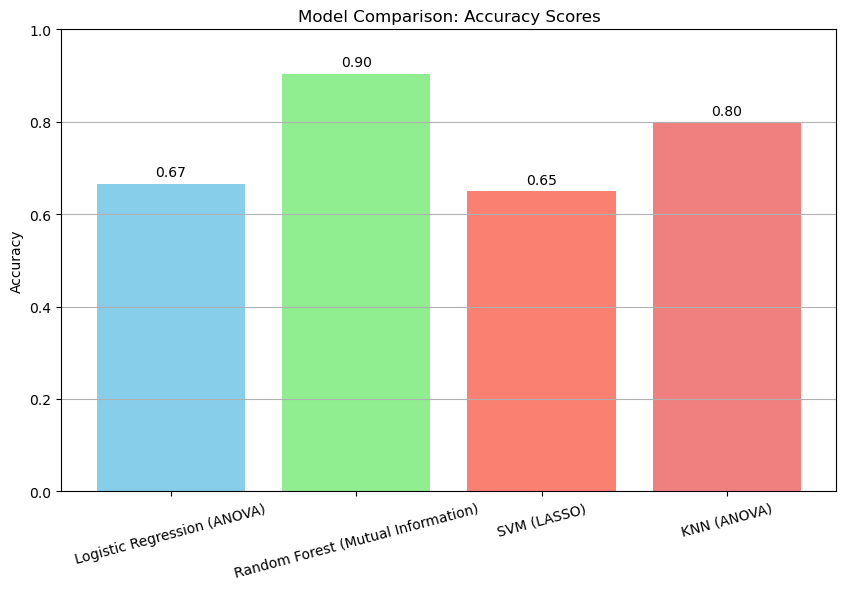

In [60]:
# Step 7: Create a comparison graph
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.ylim(0, 1)
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)

# Add accuracy labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.grid(axis='y')
plt.show()


In [85]:
data['HasCardiovascularDisease'] = ((data['prevalentHyp'] == 1) | 
                                   (data['prevalentStroke'] == 1) | 
                                   (data['BPMeds'] > 0) |
                                   (data['sysBP'] >= 140) |
                                   (data['diaBP'] >= 90)).astype(int)

# Print the updated dataset head to verify the new column
print("Dataset Head with new CVD column:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Head with new CVD column:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  H

In [98]:


def predict_cvd():
    # Load and preprocess the data
    data = pd.read_csv(r'C:\\framingham.csv')
    data.fillna(data.mean(), inplace=True)
    
    # Train the model
    X = data.drop('TenYearCHD', axis=1)
    y = data['TenYearCHD']
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)
    
    # Get user input for all features
    print("\nEnter your health information:")
    input_data = {
        'male': int(input("Gender (1 for Male, 0 for Female): ")),
        'age': int(input("Age (in years): ")),
        'education': float(input("Education level (1-4): ")),
        'currentSmoker': int(input("Current smoker? (1 for Yes, 0 for No): ")),
        'cigsPerDay': float(input("Cigarettes per day: ")),
        'BPMeds': float(input("On BP medication? (1 for Yes, 0 for No): ")),
        'prevalentStroke': int(input("Had a stroke? (1 for Yes, 0 for No): ")),
        'prevalentHyp': int(input("Has hypertension? (1 for Yes, 0 for No): ")),
        'diabetes': int(input("Has diabetes? (1 for Yes, 0 for No): ")),
        'totChol': float(input("Total Cholesterol level: ")),
        'sysBP': float(input("Systolic Blood Pressure: ")),
        'diaBP': float(input("Diastolic Blood Pressure: ")),
        'BMI': float(input("Body Mass Index: ")),
        'heartRate': float(input("Heart Rate: ")),
        'glucose': float(input("Glucose Level: "))
    }
    
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Make prediction
    risk_probability = model.predict_proba(input_df)[0][1]
    prediction = model.predict(input_df)[0]
    
    # Display results
    print("\n=== Results ===")
    print(f"CVD Risk Probability: {risk_probability*100:.2f}%")
    
    if prediction == 1:
        print("Risk Level: HIGH")
        if risk_probability > 0.7:
            print("Recommendation: Immediate medical consultation is strongly recommended.")
        else:
            print("Recommendation: Regular medical check-ups and lifestyle modifications are recommended.")
    else:
        print("Risk Level: LOW")
        if risk_probability > 0.3:
            print("Recommendation: Consider preventive measures and healthy lifestyle choices.")
        else:
            print("Recommendation: Maintain healthy lifestyle habits.")

# Run the prediction
predict_cvd()


Enter your health information:


Gender (1 for Male, 0 for Female):  1
Age (in years):  50
Education level (1-4):  4
Current smoker? (1 for Yes, 0 for No):  1
Cigarettes per day:  10
On BP medication? (1 for Yes, 0 for No):  1
Had a stroke? (1 for Yes, 0 for No):  0
Has hypertension? (1 for Yes, 0 for No):  1
Has diabetes? (1 for Yes, 0 for No):  1
Total Cholesterol level:  300
Systolic Blood Pressure:  125
Diastolic Blood Pressure:  88
Body Mass Index:  23
Heart Rate:  90
Glucose Level:  115



=== Results ===
CVD Risk Probability: 37.00%
Risk Level: LOW
Recommendation: Consider preventive measures and healthy lifestyle choices.
